# PCA from scratch 

Date: 3/22/19

---

### Inspiration for the Deeper Dive

Code taken from: http://sebastianraschka.com/Articles/2014_pca_step_by_step.html

#### Goal
Used the code to walk through the process

Key Takeaways:

- PCA is eigen decomposition that is a feature reduction unsupervised algorithm that reduces features with no variance "influence" to lower dimensions
- Eigenvectors direction
- Eigenvalues magnitude

#### Key Formulas:

2 ways to get the covariance matrix:

1. Scatter Matrix

$$S=\sum+{k=1}^n(x_{k}-m)(x_{k}-m)^T$$

where $m$ is the mean vector

$$m=\frac{1}{n}\sum_{k=1}^nx_{k}$$

2. Covariance Matrix

Same as the scatter matrix except a scaling factor of $\frac{1}{N-1}$ is employed


In [2]:
import numpy as np

np.random.seed(1234)

# Generate random simulated data
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3, 20)

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

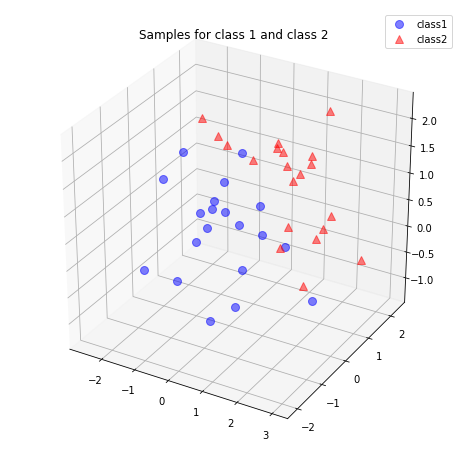

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### Merging/Concatenating the X data

In [5]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40)

### Means of the d-dimensional mean vector

In [6]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.53513993]
 [0.3204501 ]
 [0.74643724]]


### Scatter Matrix (1st way)

$$S=\sum_{k=1}^n(x_{k}-m)(x_{k}-m)^T$$

where $m$ is the mean vector

$$m=\frac{1}{n}\sum_{k=1}^nx_{k}$$

In [7]:
scatter_matrix = np.zeros((3,3))

for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - \
                      mean_vector).dot((all_samples[:,i].reshape(3,1) - \
                                      mean_vector).T)
    
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[69.32153776 -0.44803277 -2.35946406]
 [-0.44803277 42.94895756  6.02095291]
 [-2.35946406  6.02095291 25.85365764]]


### Covariance Matrix

$$S=\frac{1}{N-1}\sum_{k=1}^n(x_{k}-m)(x_{k}-m)^T $$


In [9]:
cov_mat = np.cov([all_samples[0,:], all_samples[1,:], all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.77747533 -0.01148802 -0.06049908]
 [-0.01148802  1.10125532  0.15438341]
 [-0.06049908  0.15438341  0.6629143 ]]


### Eigenvalues & Eigenvectors

In [14]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all()
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i] / eig_val_cov[i])
    print(40*'-')

Eigenvector 1: 
[[ 0.99785694]
 [-0.03005032]
 [-0.0581249 ]]
Eigenvalue 1 from scatter matrix: 69.47246835455627
Eigenvalue 1 from covariance matrix: 1.781345342424521
Scaling factor:  38.99999999999997
----------------------------------------
Eigenvector 2: 
[[-0.04649955]
 [ 0.2993114 ]
 [-0.95302176]]
Eigenvalue 2 from scatter matrix: 23.847560879317143
Eigenvalue 2 from covariance matrix: 0.6114759199824904
Scaling factor:  39.00000000000003
----------------------------------------
Eigenvector 3: 
[[-0.04603605]
 [-0.95368216]
 [-0.29727263]]
Eigenvalue 3 from scatter matrix: 44.80412372467968
Eigenvalue 3 from covariance matrix: 1.1488236852481977
Scaling factor:  38.99999999999997
----------------------------------------


### But what happens if the matrix is not PSD (Positive Semi Definite):

Most likely there is a record that is either identical or a linear combiation of another record. In this case... you have to find a "near PD" which finds the nearest PD.

https://stackoverflow.com/questions/10939213/how-can-i-calculate-the-nearest-positive-semi-definite-matrix/10940283#10940283

In [16]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

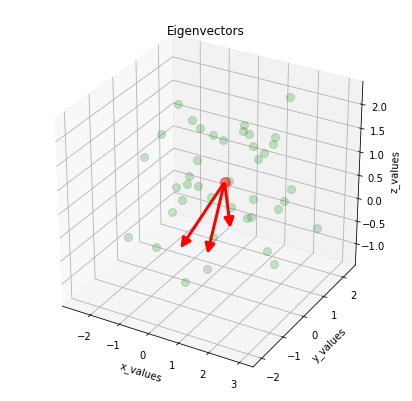

In [17]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

### Ranking Eigenvectors by Eigenvalues

Recall *eigenvalues* indicate magnitude and *eigenvectors* represent direction which will form the new reduced axis

In [18]:
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

for i in eig_pairs:
    print(i[0])

69.47246835455627
44.80412372467968
23.847560879317143


### Matrix W = k Principal Components 

In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.99785694 -0.04603605]
 [-0.03005032 -0.95368216]
 [-0.0581249  -0.29727263]]


## Viola --> New Subspace y

$$y=W^T*x$$

In [21]:
y = matrix_w.T.dot(all_samples)

assert y.shape == (2, 40)

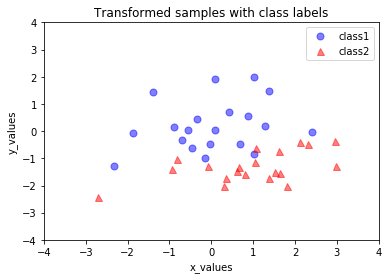

In [24]:
plt.plot(y[0,0:20], y[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(y[0,20:40], y[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()